In [111]:
# ==============================
# 1️⃣ Import Libraries
# ==============================

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# ==============================
# 2️⃣ Load Dataset
# ==============================

In [114]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

columns = [
    "symboling","normalized_losses","make","fuel_type","aspiration",
    "num_of_doors","body_style","drive_wheels","engine_location",
    "wheel_base","length","width","height","curb_weight",
    "engine_type","num_of_cylinders","engine_size",
    "fuel_system","bore","stroke","compression_ratio",
    "horsepower","peak_rpm","city_mpg","highway_mpg","price"
]

df = pd.read_csv(url, names=columns)

In [115]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [116]:
# ==============================
# 3️⃣ Data Cleaning
# ==============================

In [117]:
df.replace("?", np.nan, inplace=True)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [118]:
df.drop(columns=["engine_location", "fuel_type"], inplace=True)

In [119]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    str    
 2   make               205 non-null    str    
 3   aspiration         205 non-null    str    
 4   num_of_doors       203 non-null    str    
 5   body_style         205 non-null    str    
 6   drive_wheels       205 non-null    str    
 7   wheel_base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb_weight        205 non-null    int64  
 12  engine_type        205 non-null    str    
 13  num_of_cylinders   205 non-null    str    
 14  engine_size        205 non-null    int64  
 15  fuel_system        205 non-null    str    
 16  bore               201 non-null    st

In [120]:
# ==============================
# 4️⃣ Convert Numeric Columns
# ==============================

In [121]:
numeric_cols = [
    "normalized_losses","wheel_base","length","width","height",
    "curb_weight","engine_size","bore","stroke",
    "compression_ratio","horsepower","peak_rpm",
    "city_mpg","highway_mpg","price"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col])

In [122]:
# ==============================
# 5️⃣ Handle Missing Values
# ==============================

In [123]:
df.isna().sum().sort_values(ascending= False)

normalized_losses    41
bore                  4
price                 4
stroke                4
horsepower            2
num_of_doors          2
peak_rpm              2
make                  0
wheel_base            0
drive_wheels          0
body_style            0
aspiration            0
symboling             0
length                0
height                0
width                 0
fuel_system           0
engine_size           0
num_of_cylinders      0
engine_type           0
curb_weight           0
compression_ratio     0
city_mpg              0
highway_mpg           0
dtype: int64

In [124]:
df.dropna(subset=["price"], inplace=True)

In [125]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [126]:
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\TBARK\AppData\Local\Temp\ipykernel_16400\219395809.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include="object").columns


In [127]:
df.duplicated().sum()

np.int64(0)

In [128]:
# ==============================
# 6️⃣ Outlier Detection & Removal (IQR Method)
# ==============================

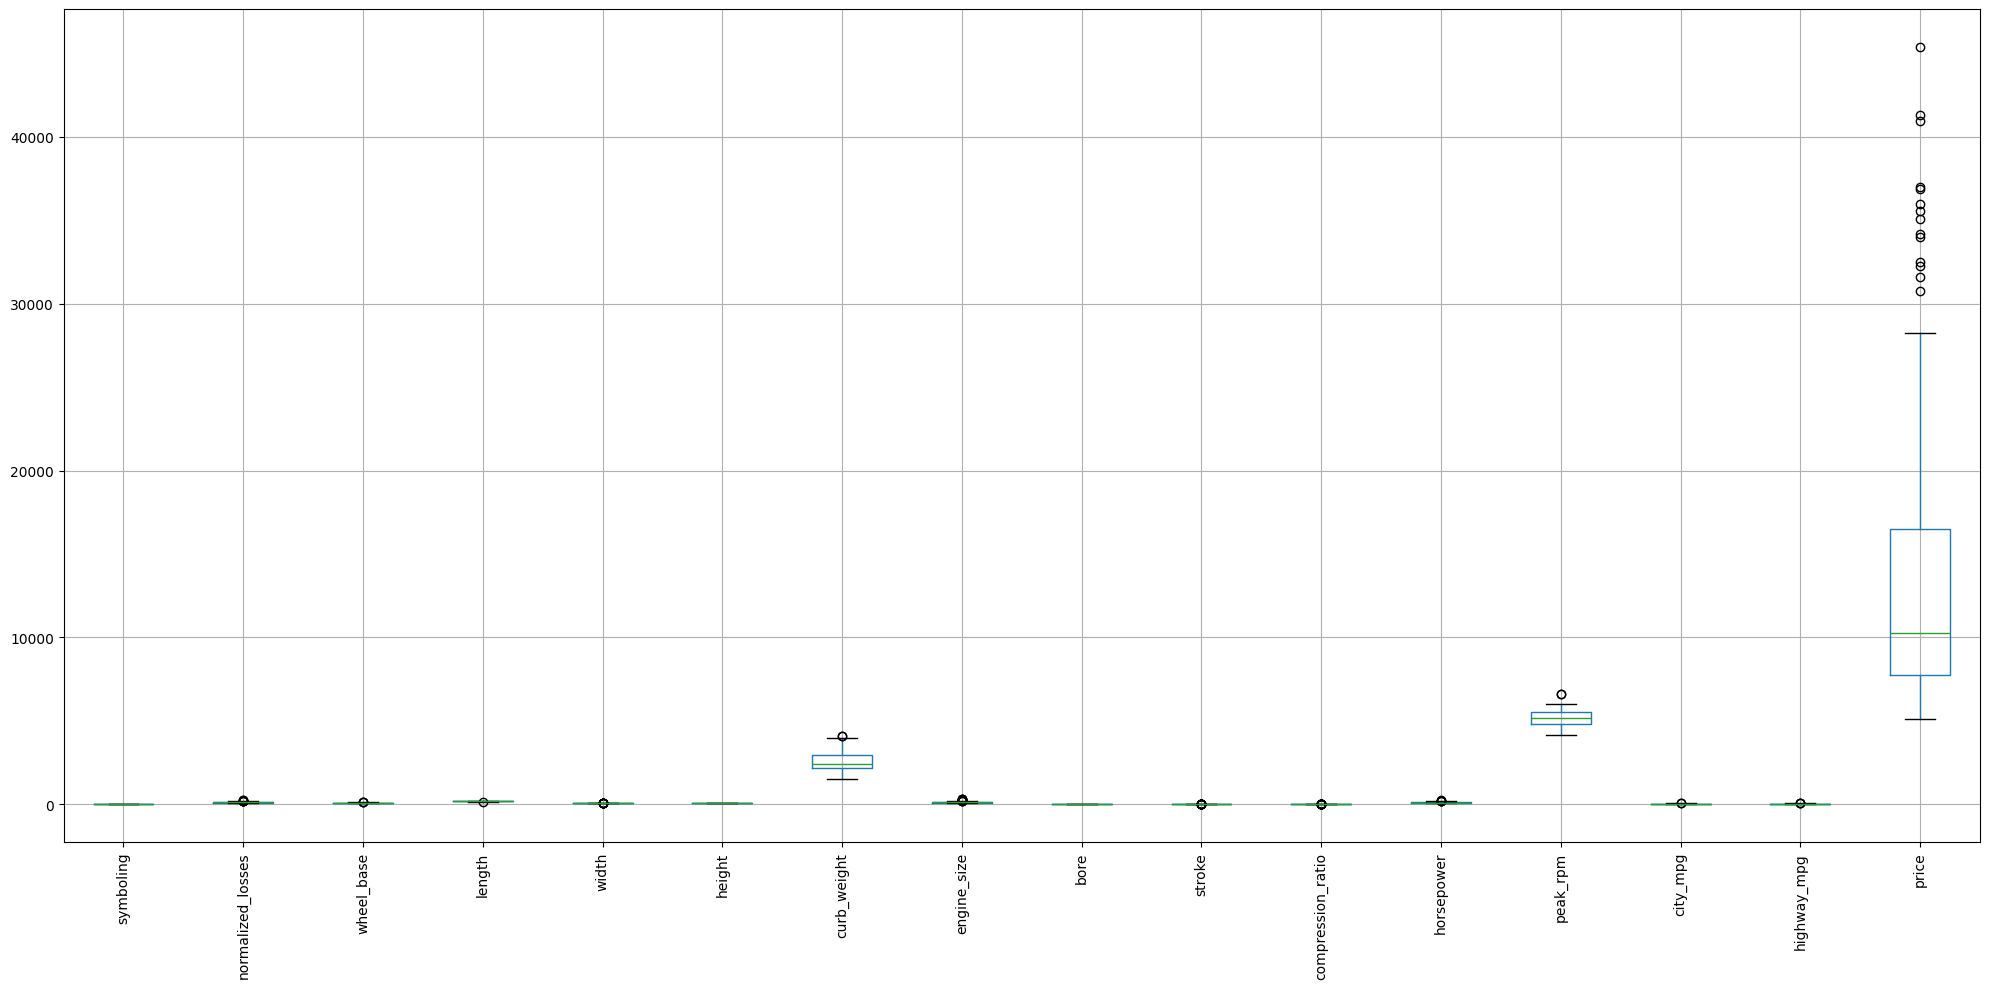

In [129]:
num_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20, 10))
num_df.boxplot(rot=90)
plt.tight_layout()
plt.show()

In [130]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

df = remove_outliers_iqr(df, numeric_cols)

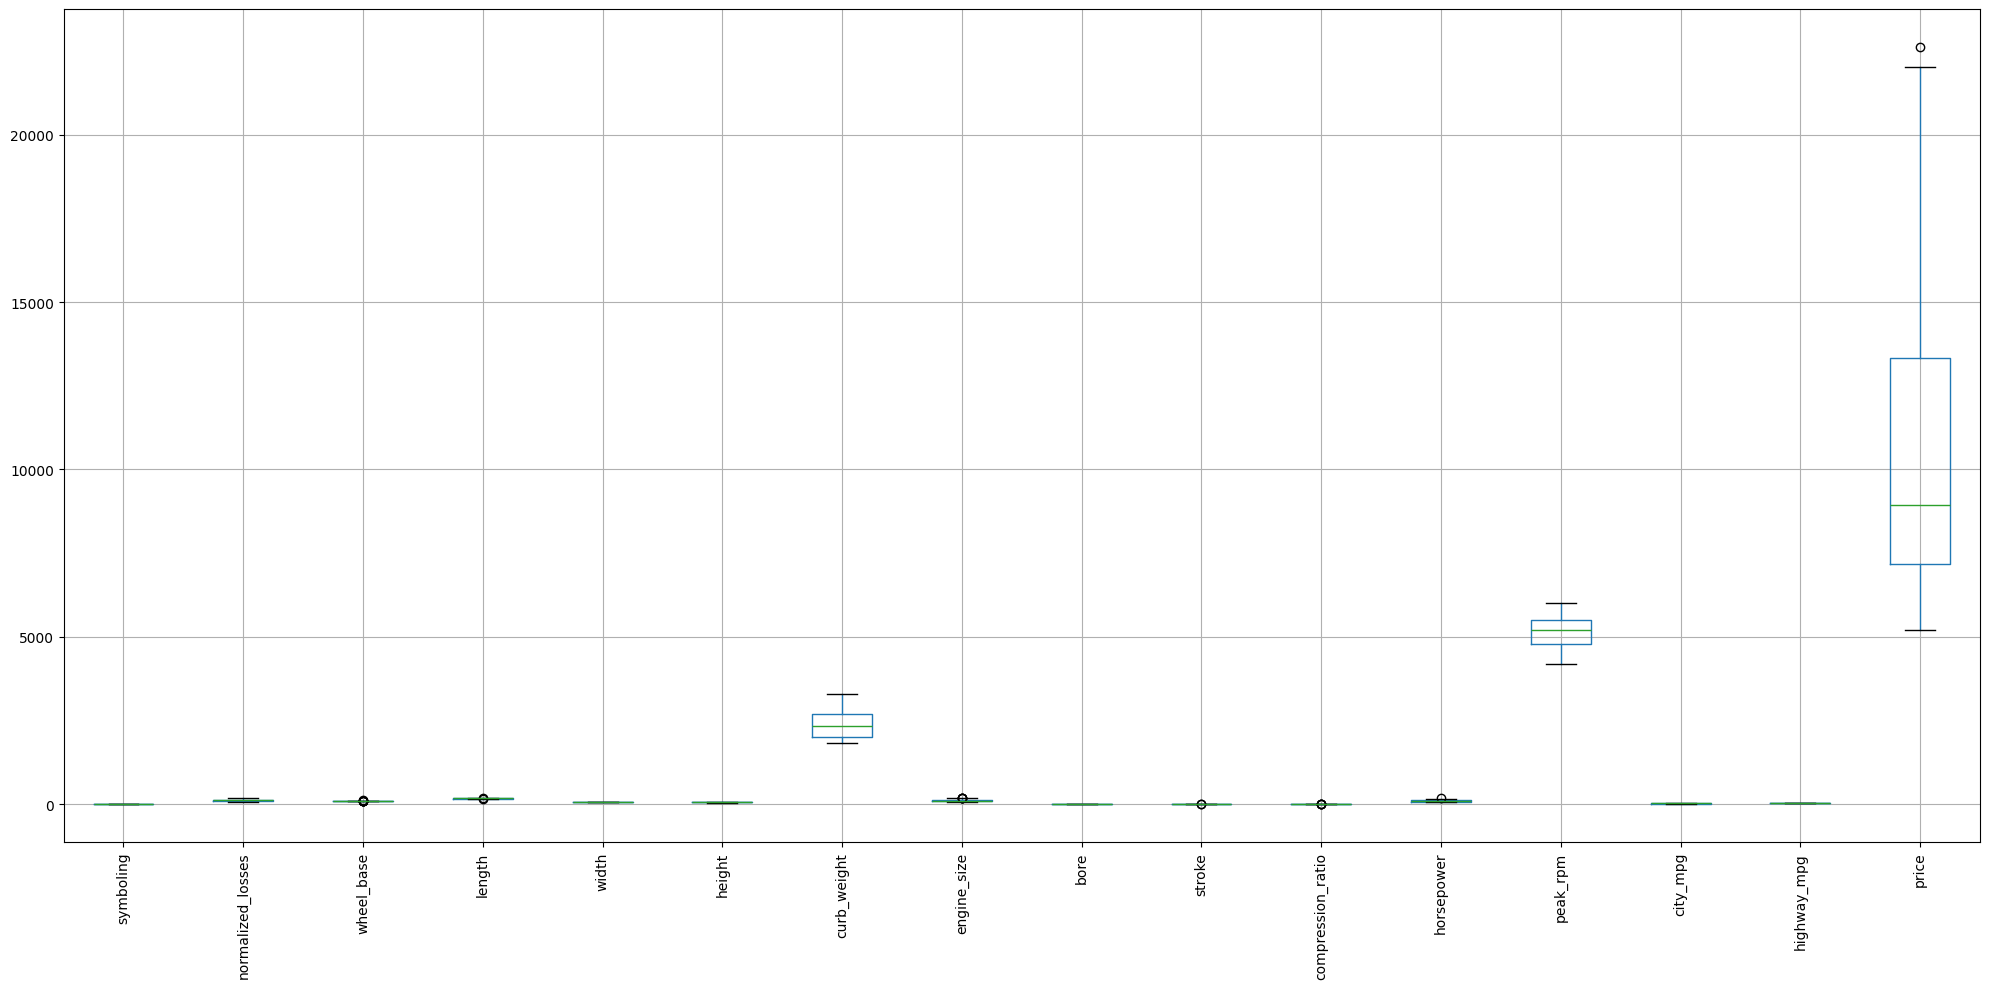

In [131]:
num_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20, 10))
num_df.boxplot(rot=90)
plt.tight_layout()
plt.show()

In [132]:
# ==============================
# 7️⃣ Encoding Categorical Features
# ==============================

In [133]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()

df["aspiration"] = label_encoder.fit_transform(df["aspiration"])

In [134]:
one_hot_encoder = OneHotEncoder(
    drop='first',
    sparse_output=False,
    handle_unknown='ignore'
)

encoded = one_hot_encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(
    encoded,
    columns=one_hot_encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

df = pd.concat([df, encoded_df], axis=1)

df.drop(columns=categorical_cols, inplace=True)


In [135]:
df.info()

<class 'pandas.DataFrame'>
Index: 120 entries, 0 to 204
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              120 non-null    int64  
 1   normalized_losses      120 non-null    float64
 2   wheel_base             120 non-null    float64
 3   length                 120 non-null    float64
 4   width                  120 non-null    float64
 5   height                 120 non-null    float64
 6   curb_weight            120 non-null    int64  
 7   engine_size            120 non-null    int64  
 8   bore                   120 non-null    float64
 9   stroke                 120 non-null    float64
 10  compression_ratio      120 non-null    float64
 11  horsepower             120 non-null    float64
 12  peak_rpm               120 non-null    float64
 13  city_mpg               120 non-null    int64  
 14  highway_mpg            120 non-null    int64  
 15  price                 

In [136]:
# ==============================
# 8️⃣ Split Features & Target
# ==============================

In [137]:
X = df.drop("price", axis=1)
y = df["price"]

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# ==============================
# 9️⃣ Feature Scaling 
# ==============================

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
# ==============================
# 🔟 KNN Regressor + Hyperparameter Tuning
# ==============================

In [142]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

k_values = range(1, 31)
rmse_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k, weights="distance", metric="manhattan")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    rmse_scores.append(rmse)

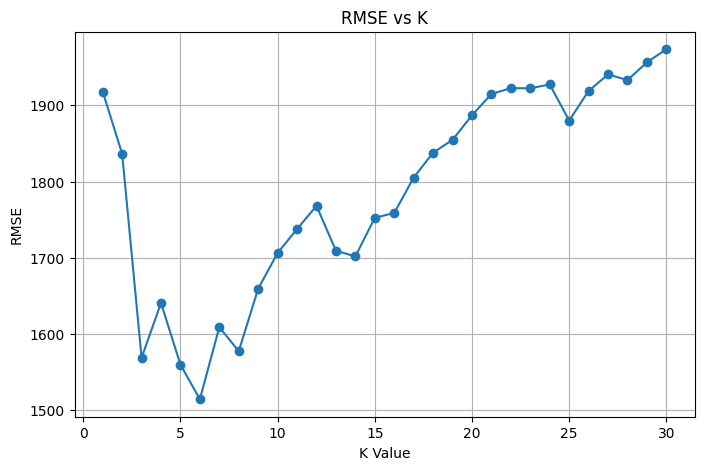

In [143]:
plt.figure(figsize=(8,5))
plt.plot(k_values, rmse_scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("RMSE")
plt.title("RMSE vs K")
plt.grid()
plt.show()

In [144]:
best_k = k_values[np.argmin(rmse_scores)]
print("Best K:", best_k)

Best K: 6


In [145]:
# ==============================
# 1️⃣1️⃣ Final Model Evaluation
# ==============================

In [146]:
final_model = KNeighborsRegressor(n_neighbors=best_k, metric="manhattan", weights="distance")
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

In [147]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [148]:
print("\nModel Evaluation:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R2 Score:", round(r2, 2))


Model Evaluation:
MAE: 1101.03
RMSE: 1514.26
R2 Score: 0.85


In [149]:
# ==============================
# 1️⃣2️⃣ Actual vs Predicted Plot
# ==============================

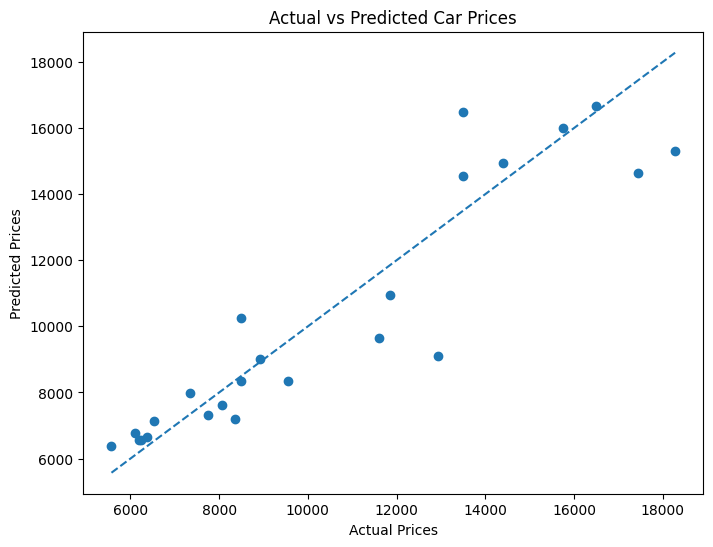

In [150]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")

plt.show()
